<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan: 50


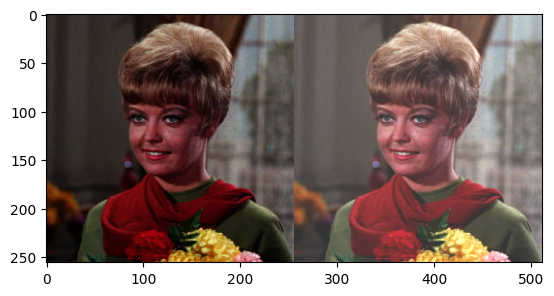

In [2]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
# for y in range(original.shape[0]):
#   for x in range(original.shape[1]):
#     for c in range(original.shape[2]):
#       brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
plt.imshow(final_frame)

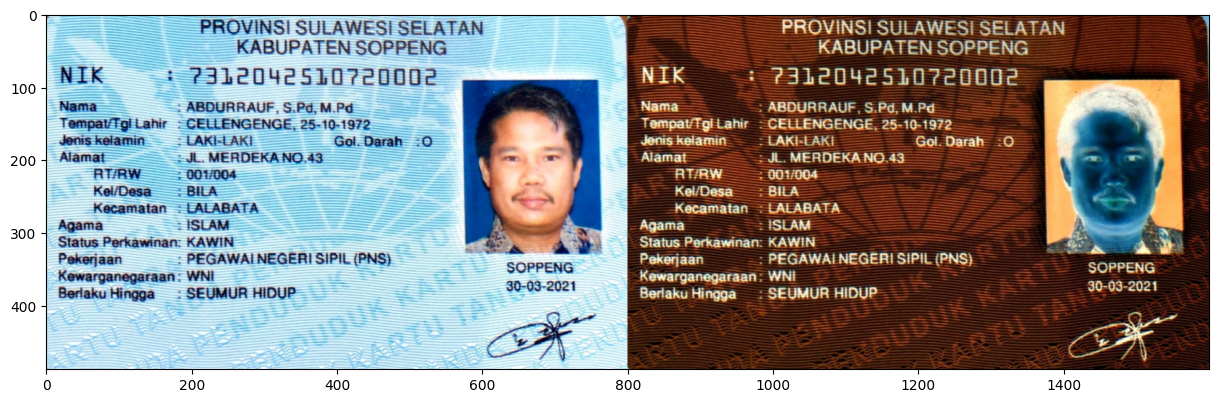

In [3]:
ktp_ori = cv.imread('/content/drive/MyDrive/KTP.jpg')
ktp_ori = cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB)

invert_ktp = np.zeros(ktp_ori.shape, ktp_ori.dtype)

for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    for c in range(ktp_ori.shape[2]):
      invert_ktp[y,x,c] = 255 - ktp_ori[y,x,c]

final_frame = cv.hconcat((ktp_ori, invert_ktp))
plt.figure(figsize=(15,5))
plt.imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


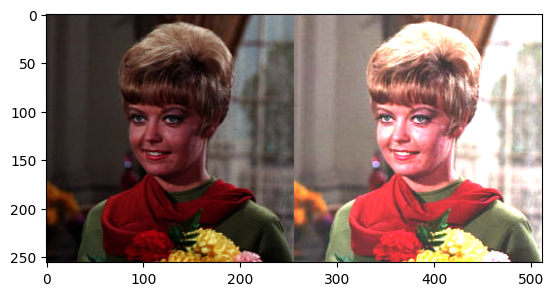

In [4]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
contrast_brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# contrast_brightness_image = cv.convertScaleAbs(original, alpha=contrast,beta=brightness)
final_frame = cv.hconcat((original, contrast_brightness_image))
plt.imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------
Masukkan nilai kecerahan: 50


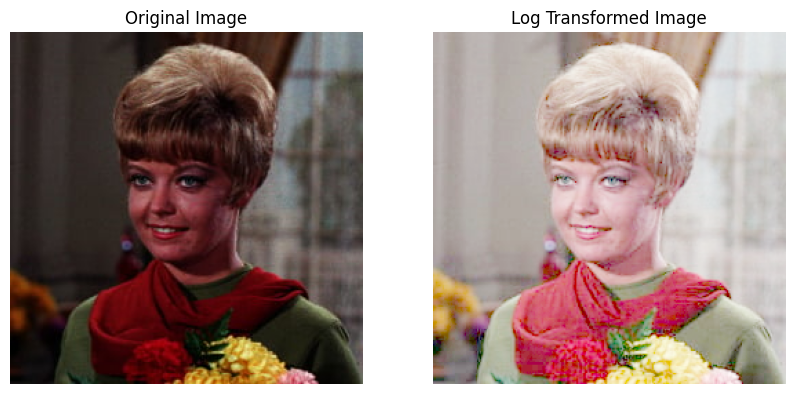

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------')

# Input brightness value
brightness = float(input('Masukkan nilai kecerahan: '))

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')

# Convert the image to float32 for precision
image = image.astype(np.float32)

# Split the image into color channels
channels = cv.split(image)

# Apply the log transformation to each channel
channels = [brightness * np.log1p(channel) for channel in channels]

# Merge the transformed channels back into one image
log_transformed = cv.merge(channels)

# Normalize the result to the range [0, 255]
log_transformed = cv.normalize(log_transformed, None, 0, 255, cv.NORM_MINMAX)

# Convert the image to uint8 for display
log_transformed = log_transformed.astype(np.uint8)

# Display the original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image.astype(np.uint8), cv.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(cv.cvtColor(log_transformed, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.axis('off')

plt.show()

#Gray Average

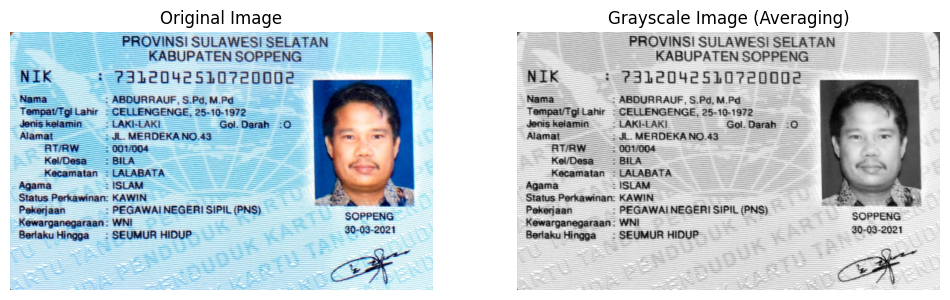

In [36]:
ktp_ori = cv.imread('/content/drive/MyDrive/KTP.jpg')
ktp_rgb = cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB)
# Mengubah tipe data menjadi float32
ktp_ori = ktp_ori.astype(np.float32)


#Grayscale AVG
grayscale_avg = np.zeros((ktp_ori.shape[0], ktp_ori.shape[1]), dtype=ktp_ori.dtype)

#akses per pixel
for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    grayscale_avg[y,x] = (ktp_ori[y,x,0] + ktp_ori[y,x,1] + ktp_ori[y,x,2]) / 3


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Image (Averaging)')
plt.imshow(grayscale_avg, cmap='gray')  # Tampilkan dengan colormap grayscale
plt.axis('off')

plt.show()

#Gray Lightness

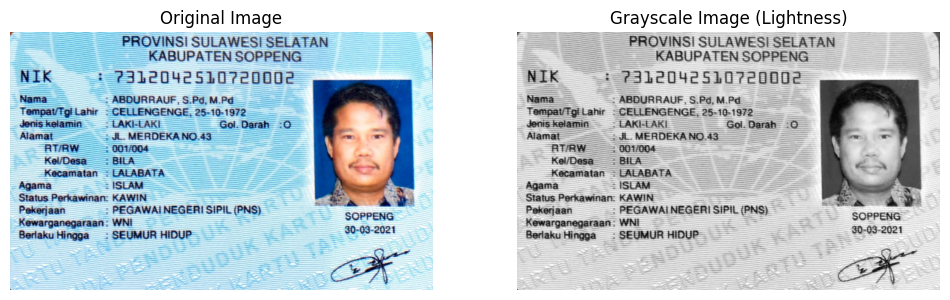

In [38]:
#Grayscale Lightness
grayscale_lightness = np.zeros((ktp_ori.shape[0], ktp_ori.shape[1]), dtype=ktp_ori.dtype)

#akses per pixel
for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    grayscale_lightness[y,x] = (max(ktp_ori[y,x,0], ktp_ori[y,x,1], ktp_ori[y,x,2])
                              + min(ktp_ori[y,x,0], ktp_ori[y,x,1], ktp_ori[y,x,2]))/2


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Image (Lightness)')
plt.imshow(grayscale_lightness, cmap='gray')  # Tampilkan dengan colormap grayscale
plt.axis('off')

plt.show()

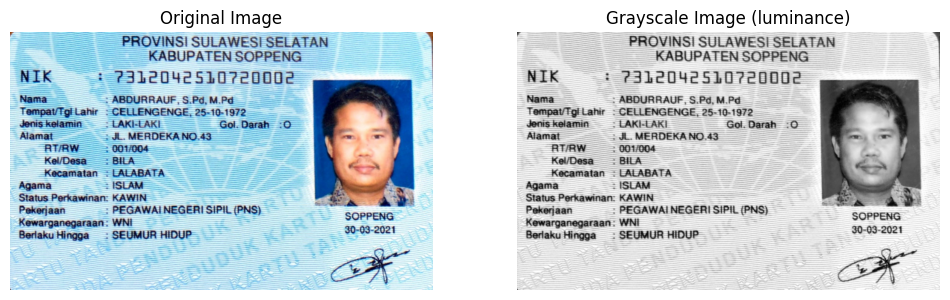

In [59]:
#Grayscale Luminance
grayscale_luminance = np.zeros((ktp_ori.shape[0], ktp_ori.shape[1]), dtype=ktp_ori.dtype)

#akses per pixel
for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    grayscale_luminance[y,x] = (0.21 * ktp_ori[y,x,0] + 0.72 * ktp_ori[y,x,1] + 0.07 * ktp_ori[y,x,2])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Image (luminance)')
plt.imshow(grayscale_luminance, cmap='gray')  # Tampilkan dengan colormap grayscale
plt.axis('off')

plt.show()

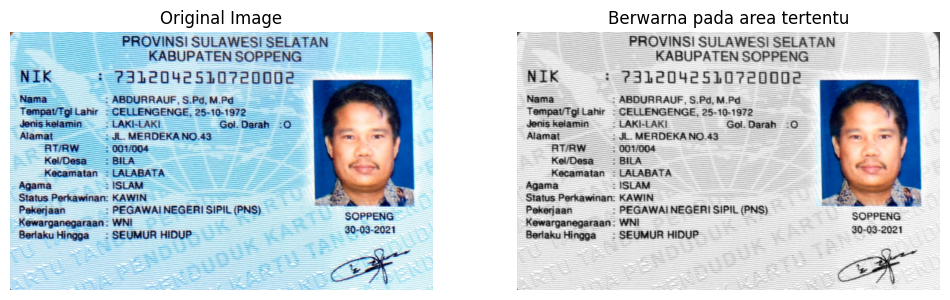

In [90]:
ktp_ori = cv.imread('/content/drive/MyDrive/KTP.jpg')
ktp_rgb = cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB)
# Tentukan area yang ingin dipilih
x, y, w, h = 565, 90, 200, 240  # ganti dengan koordinat dan ukuran area yang sesuai
mask = np.zeros(ktp_rgb.shape[:2], dtype=np.uint8)

# Buat mask untuk area yang dipilih
mask[y:y+h, x:x+w] = 255

# Ubah gambar di luar area yang dipilih menjadi grayscale
ktp_gray = cv.cvtColor(ktp_rgb, cv.COLOR_BGR2GRAY)
ktp_gray_colored = cv.cvtColor(ktp_gray, cv.COLOR_GRAY2RGB)

# Gunakan mask untuk menjaga area yang dipilih tetap berwarna
result = np.where(mask[:, :, None].astype(bool), ktp_rgb, ktp_gray_colored)
# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Berwarna pada area tertentu')
plt.imshow(result)
plt.axis('off')

plt.show()